In [25]:
import cotengra as ctg
import numpy as np

In [26]:
#  einsum like interface

x = np.random.rand(2, 3)
y = np.random.rand(3, 4)

# einsum style
z = ctg.einsum("ab,bc->ca", x, y)

print(z)

# programmatic style
z = ctg.array_contract(
  arrays=(x, y), 
  inputs=[(0, 1), (1, 2)], 
  output=(2, 0),
)

print(z)

[[1.30250765 1.04835693]
 [0.95432259 0.72473776]
 [1.56128641 0.9720214 ]
 [1.50187988 1.05459624]]
[[1.30250765 1.04835693]
 [0.95432259 0.72473776]
 [1.56128641 0.9720214 ]
 [1.50187988 1.05459624]]


In [27]:
## a little bit complex example

def get_shape(A):
    return A.shape

#### involved function os cotengra 

#### 1. ctg.utils.eq_to_inputs_output
#### 2. ctg.utils.make_arrays_from_inputs

eq = "PQ,iP,aP,jQ,bQ,RS,aR,cR,bS,dS,TU,iT,cT,jU,dU,iV,jV,aV,bV,iW,jW,cW,dW->"

inputs, output = ctg.utils.eq_to_inputs_output(eq)

print(inputs)

size_dict = {'P': 4, 'Q': 4, 'i': 4, 'a': 4, 'j': 4, 'b': 4, 'R': 4, 'S': 4, 'c': 4, 'd': 4, 'T': 4, 'U': 4, 'V': 4, 'W': 4}

arrays = ctg.utils.make_arrays_from_inputs(inputs, size_dict, seed=42)

shapes = tuple(map(get_shape, arrays))

#print(arrays)

ctg.einsum(eq, *arrays)

(('P', 'Q'), ('i', 'P'), ('a', 'P'), ('j', 'Q'), ('b', 'Q'), ('R', 'S'), ('a', 'R'), ('c', 'R'), ('b', 'S'), ('d', 'S'), ('T', 'U'), ('i', 'T'), ('c', 'T'), ('j', 'U'), ('d', 'U'), ('i', 'V'), ('j', 'V'), ('a', 'V'), ('b', 'V'), ('i', 'W'), ('j', 'W'), ('c', 'W'), ('d', 'W'))


array(-7.88491912e-13)

In [28]:
print(shapes)

((4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4))


{'flops': 16720, 'write': 4177, 'size': 1024}


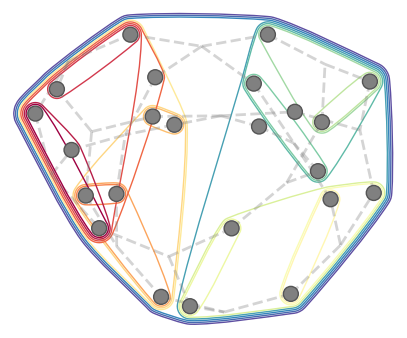

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [29]:
### print out the information 

tree = ctg.einsum_tree(eq, *shapes)

# some typical quantities of interest:
print(tree.contract_stats())

tree.plot_rubberband()

In [31]:
#### generate the functions that can perform the contraction for any input ! 

expr = ctg.einsum_expression(eq, *shapes)   ### for the given shape !!!! ###
expr(*arrays)

arrays = ctg.utils.make_arrays_from_inputs(inputs, size_dict, seed=43)
expr(*arrays)

array(3.98394164e-11)